<a href="https://colab.research.google.com/github/sirvi2002/algorithm/blob/master/Lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/train",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary',
                                          shuffle=False )

Found 240 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
test_dataset = test.flow_from_directory("/content/drive/MyDrive/testing",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary',
                                          shuffle=False )

Found 20 images belonging to 2 classes.


In [ ]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 6)       168       
                                                                 
 average_pooling2d (AverageP  (None, 74, 74, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 36, 36, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense (Dense)               (None, 120)               2

In [ ]:
'''from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_dataset,
  validation_data=train_dataset,
  epochs=30,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)'''

'from datetime import datetime\nfrom keras.callbacks import ModelCheckpoint\n\n\n\ncheckpoint = ModelCheckpoint(filepath=\'mymodel.h5\', \n                               verbose=2, save_best_only=True)\n\ncallbacks = [checkpoint]\n\nstart = datetime.now()\n\nmodel_history=model.fit_generator(\n  train_dataset,\n  validation_data=train_dataset,\n  epochs=30,\n  steps_per_epoch=5,\n  validation_steps=32,\n    callbacks=callbacks ,verbose=2)\n\n\nduration = datetime.now() - start\nprint("Training completed in time: ", duration)'

In [ ]:
from datetime import datetime
start=datetime.now()
model.fit(train_dataset,
         steps_per_epoch = 1,
         epochs = 25,
         validation_data = train_dataset,
         )
print(datetime.now()-start)

Epoch 1/25
1/1 [==============================] - 4s 4s/step - loss: 0.5630 - accuracy: 1.0000 - val_loss: 0.6644 - val_accuracy: 0.5750
Epoch 2/25
1/1 [==============================] - 6s 6s/step - loss: 0.8735 - accuracy: 0.1875 - val_loss: 0.6775 - val_accuracy: 0.5000
Epoch 3/25
1/1 [==============================] - 6s 6s/step - loss: 0.4103 - accuracy: 1.0000 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 4/25
1/1 [==============================] - 6s 6s/step - loss: 1.0027 - accuracy: 0.0000e+00 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 5/25
1/1 [==============================] - 7s 7s/step - loss: 0.4230 - accuracy: 1.0000 - val_loss: 0.7062 - val_accuracy: 0.5000
Epoch 6/25
1/1 [==============================] - 6s 6s/step - loss: 0.3457 - accuracy: 1.0000 - val_loss: 0.7258 - val_accuracy: 0.5000
Epoch 7/25
1/1 [==============================] - 6s 6s/step - loss: 0.5421 - accuracy: 0.7500 - val_loss: 0.7503 - val_accuracy: 0.5000
Epoch 8/25
1/1 [=====================

In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_dataset, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 0s 317ms/step - loss: 0.6371 - accuracy: 0.6500
test loss, test acc: [0.6370723843574524, 0.6499999761581421]


In [ ]:
test_dataset.class_indices


{'clean': 0, 'noise': 1}

In [ ]:
train_dataset.class_indices

{'clean': 0, 'noise': 1}

In [ ]:
from google.colab.patches import cv2_imshow

def predictimg(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    # plt.imshow(img1)
    cv2_imshow(cv2.imread(filename))
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    if val==1:
      return 1
    else:
      return 0


Testing noisy images


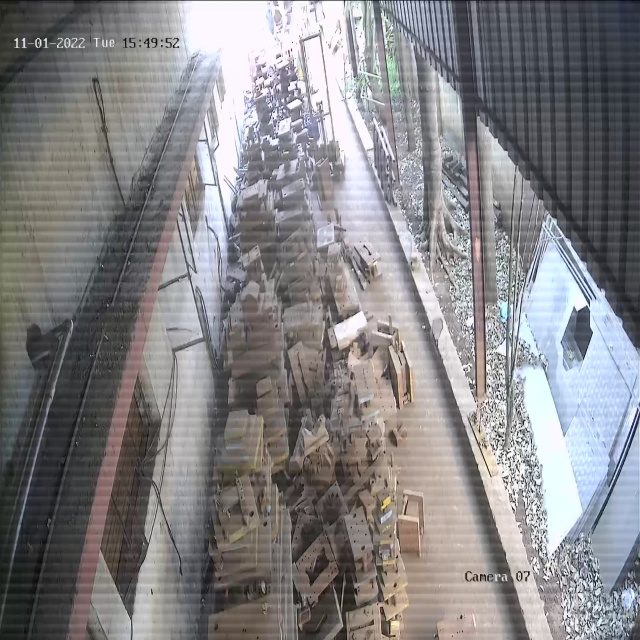

1/1 [==============================] - 0s 42ms/step
NOISE


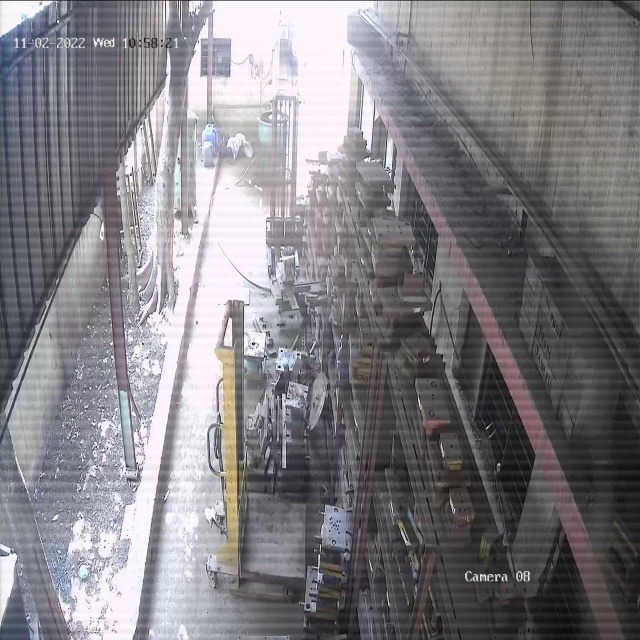

1/1 [==============================] - 0s 44ms/step
NOISE


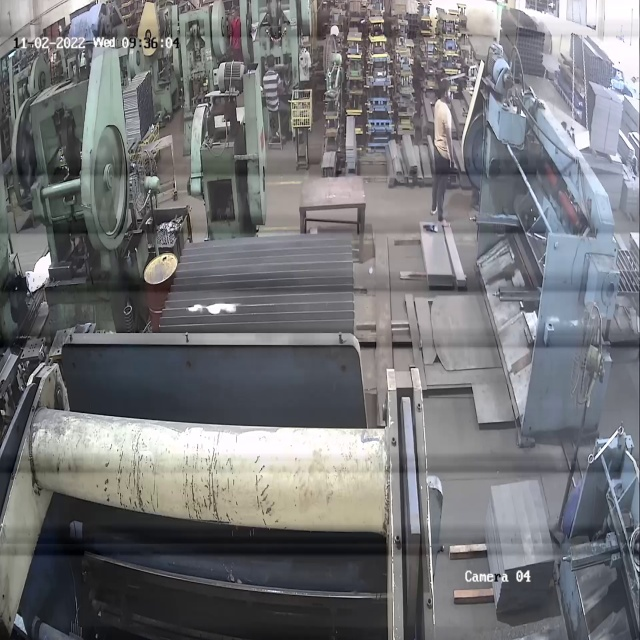

1/1 [==============================] - 0s 54ms/step
CLEAN


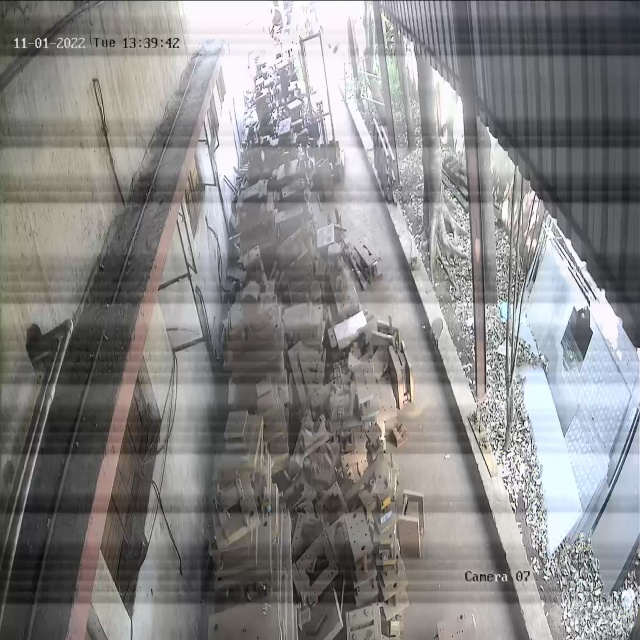

1/1 [==============================] - 0s 44ms/step
NOISE


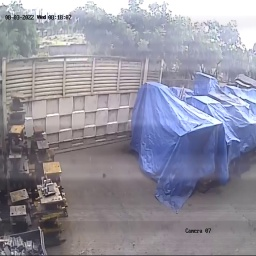

1/1 [==============================] - 0s 44ms/step
CLEAN


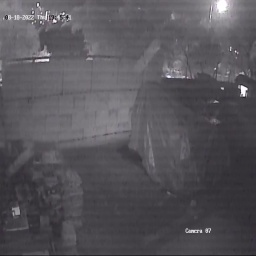

1/1 [==============================] - 0s 44ms/step
CLEAN


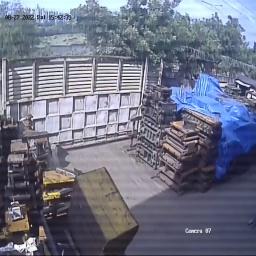

1/1 [==============================] - 0s 45ms/step
CLEAN


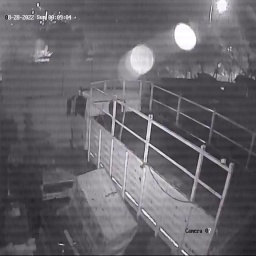

1/1 [==============================] - 0s 53ms/step
CLEAN


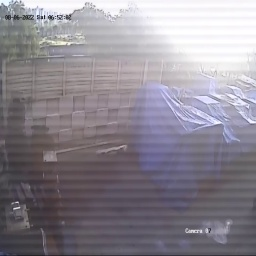

1/1 [==============================] - 0s 40ms/step
CLEAN


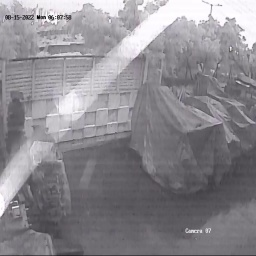

1/1 [==============================] - 0s 41ms/step
CLEAN
Testing clean images


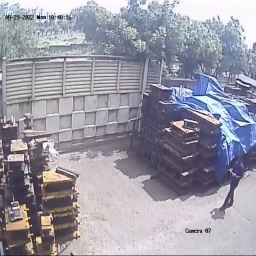

1/1 [==============================] - 0s 41ms/step
CLEAN
0


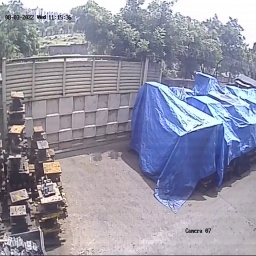

1/1 [==============================] - 0s 43ms/step
CLEAN
0


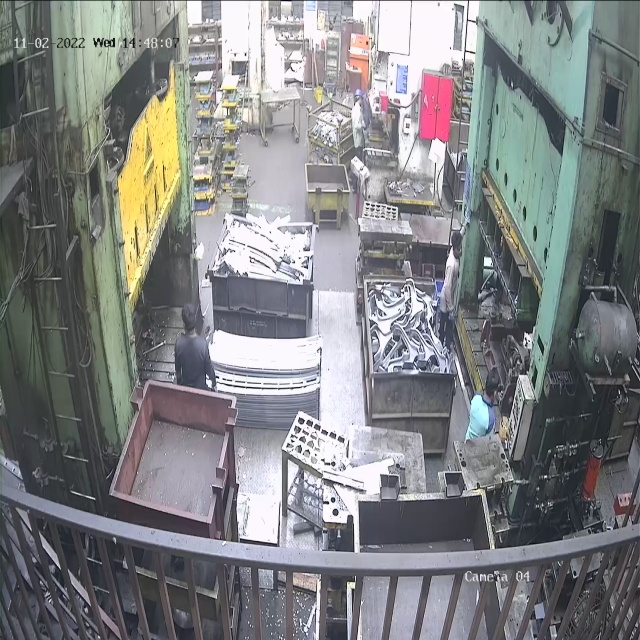

1/1 [==============================] - 0s 50ms/step
CLEAN
0


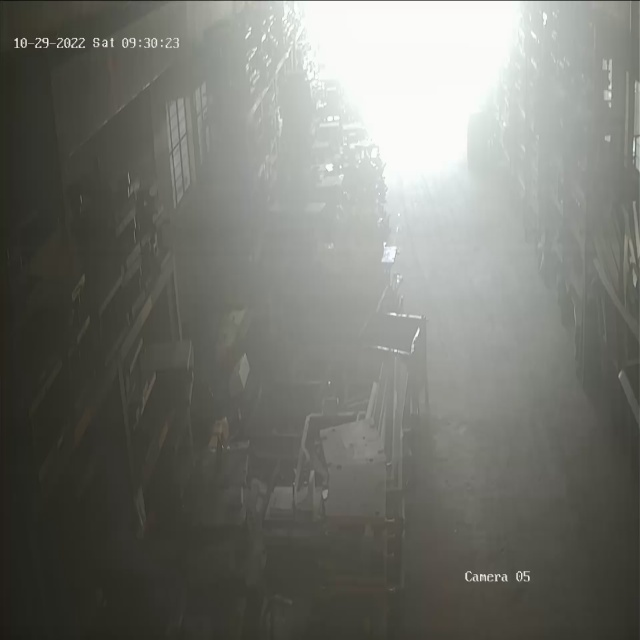

1/1 [==============================] - 0s 46ms/step
CLEAN
0


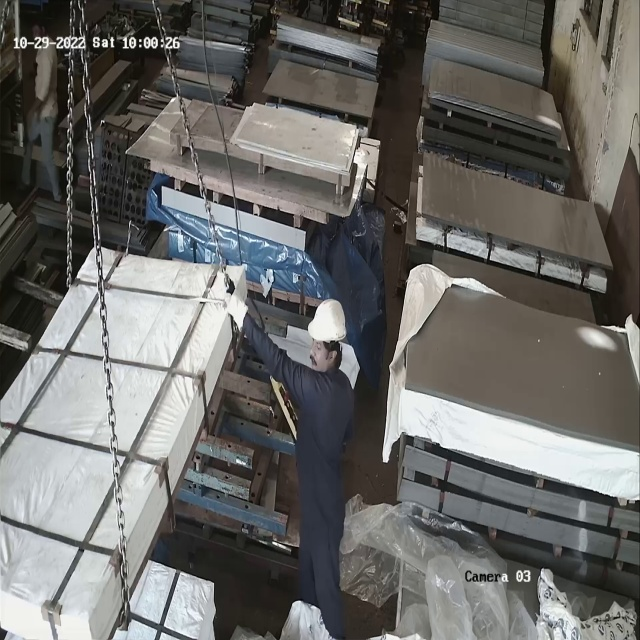

1/1 [==============================] - 0s 49ms/step
CLEAN
0


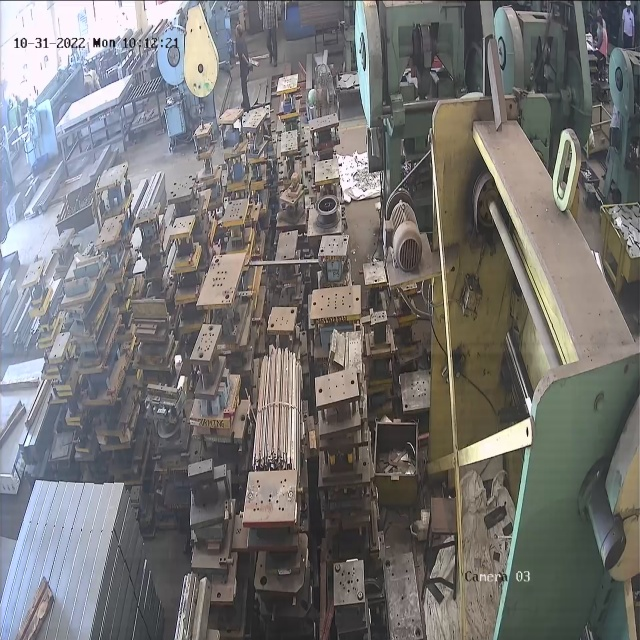

1/1 [==============================] - 0s 51ms/step
CLEAN
0


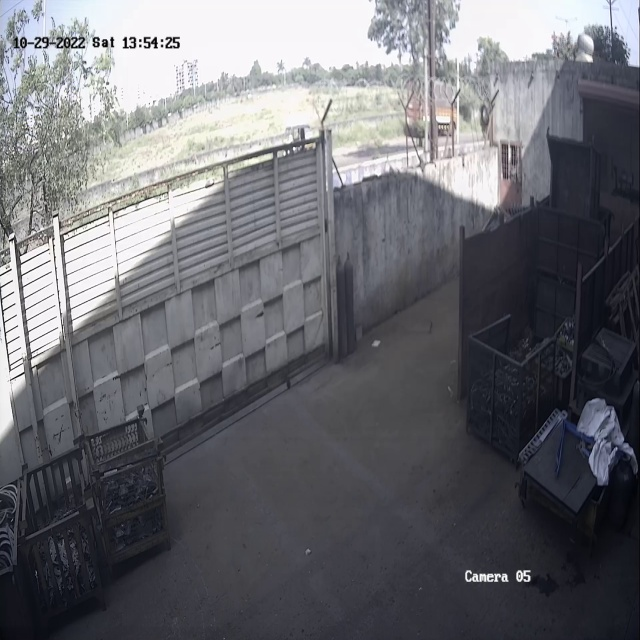

1/1 [==============================] - 0s 45ms/step
CLEAN
0


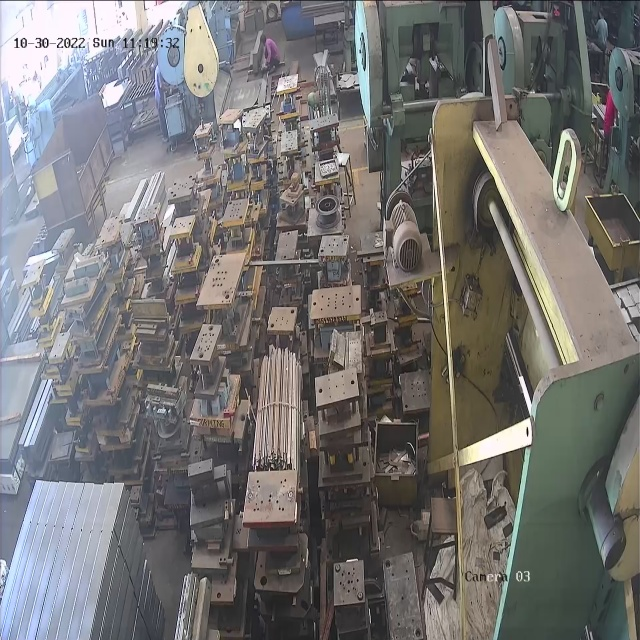

1/1 [==============================] - 0s 60ms/step
CLEAN
0


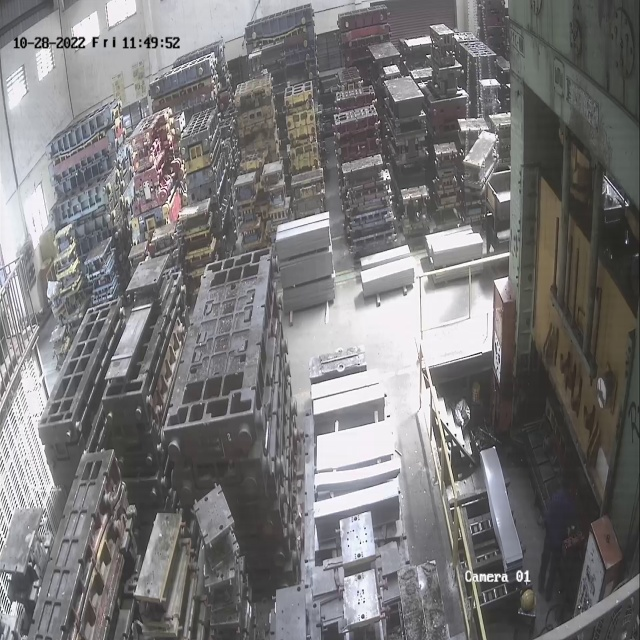

1/1 [==============================] - 0s 43ms/step
CLEAN
0


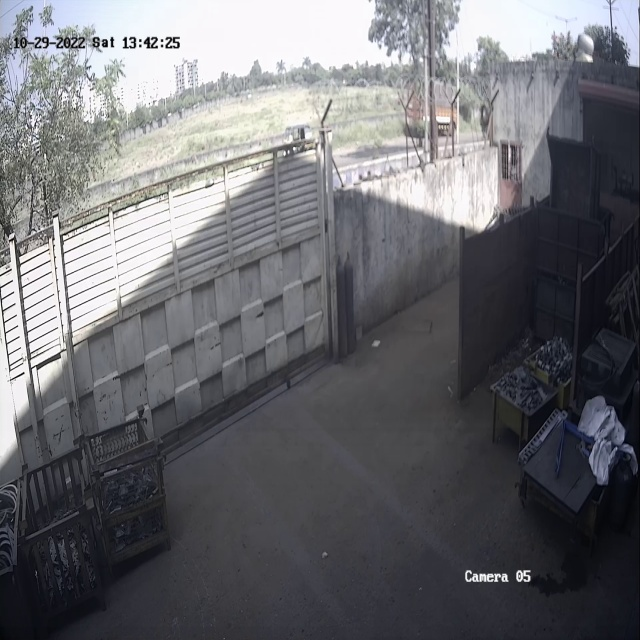

1/1 [==============================] - 0s 43ms/step
CLEAN
0
0:00:06.039729
20


In [ ]:
##custom prediction
pred=[]
import glob
from datetime import datetime
start = datetime.now()
n=0
print("Testing noisy images")
for img in glob.glob('/content/drive/MyDrive/testing/noise/*.jpg'):

  val=predictimg(img)
  if val==0:
    print("CLEAN")
  else:
    print("NOISE")  
  pred.append(val)
  n=n+1
print("Testing clean images")
for img in glob.glob('/content/drive/MyDrive/testing/clean/*.jpg'):
  val=predictimg(img)
  if val==0:
    print("CLEAN")
  else:
    print("NOISE")
  print(val)
  pred.append(val)
  n=n+1

print(datetime.now()-start)
print(n)

In [ ]:
print(pred)
len(pred)

[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


20

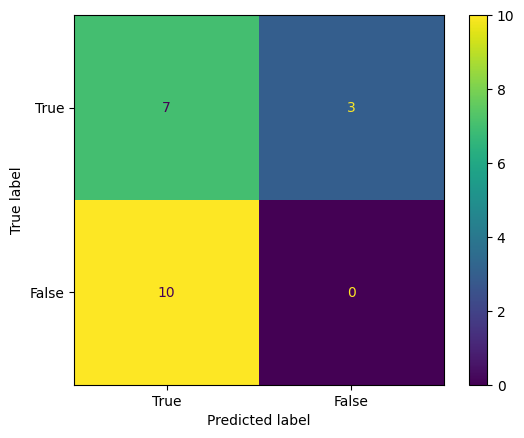

In [ ]:

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_dataset.labels , pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(test_dataset.labels , pred))
print('Recall: %.3f' % recall_score(test_dataset.labels , pred))

Precision: 0.000
Recall: 0.000


In [ ]:
from sklearn import metrics

pred= model.predict(test_dataset)
pred=np.argmax(pred, axis=-1)
print(pred)

1/1 [==============================] - 0s 319ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(test_dataset.labels , pred))
print('Recall: %.3f' % recall_score(test_dataset.labels , pred))

Precision: 0.000
Recall: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
